In [1]:
import numpy as np
import pandas as pd
from sklearn.utils import check_array
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from helper_plots import plot_feature_importances_per_iter, plot_feature_impacts_per_iter, plot_feature_gradients_per_iter, plot_total_feature_impacts, plot_prediction_feature_impacts

/var/folders/x9/kzp_gjpd5_x421nt2p7xq2500000gn/T/ipykernel_76826/659053989.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Setup Sklearn's Diabetes Dataset

In [2]:
diabetes_data = load_diabetes()
X_data, y_data = diabetes_data.data, diabetes_data.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)
feature_name_mappings = {}
for i in range(len(diabetes_data.feature_names)):
    feature_name_mappings[i] = diabetes_data.feature_names[i]
feature_name_mappings

{0: 'age',
 1: 'sex',
 2: 'bmi',
 3: 'bp',
 4: 's1',
 5: 's2',
 6: 's3',
 7: 's4',
 8: 's5',
 9: 's6'}

In [3]:
from feature_tracker import CustomGBR
# Train CustomGBR
gbr = CustomGBR(n_estimators=25, learning_rate=0.1, max_depth=3)
gbr.fit(X_train, y_train)

CustomGBR(n_estimators=25)

#### Logic behind the tree structure: Lower than threshold -> go to left node, vice versa.

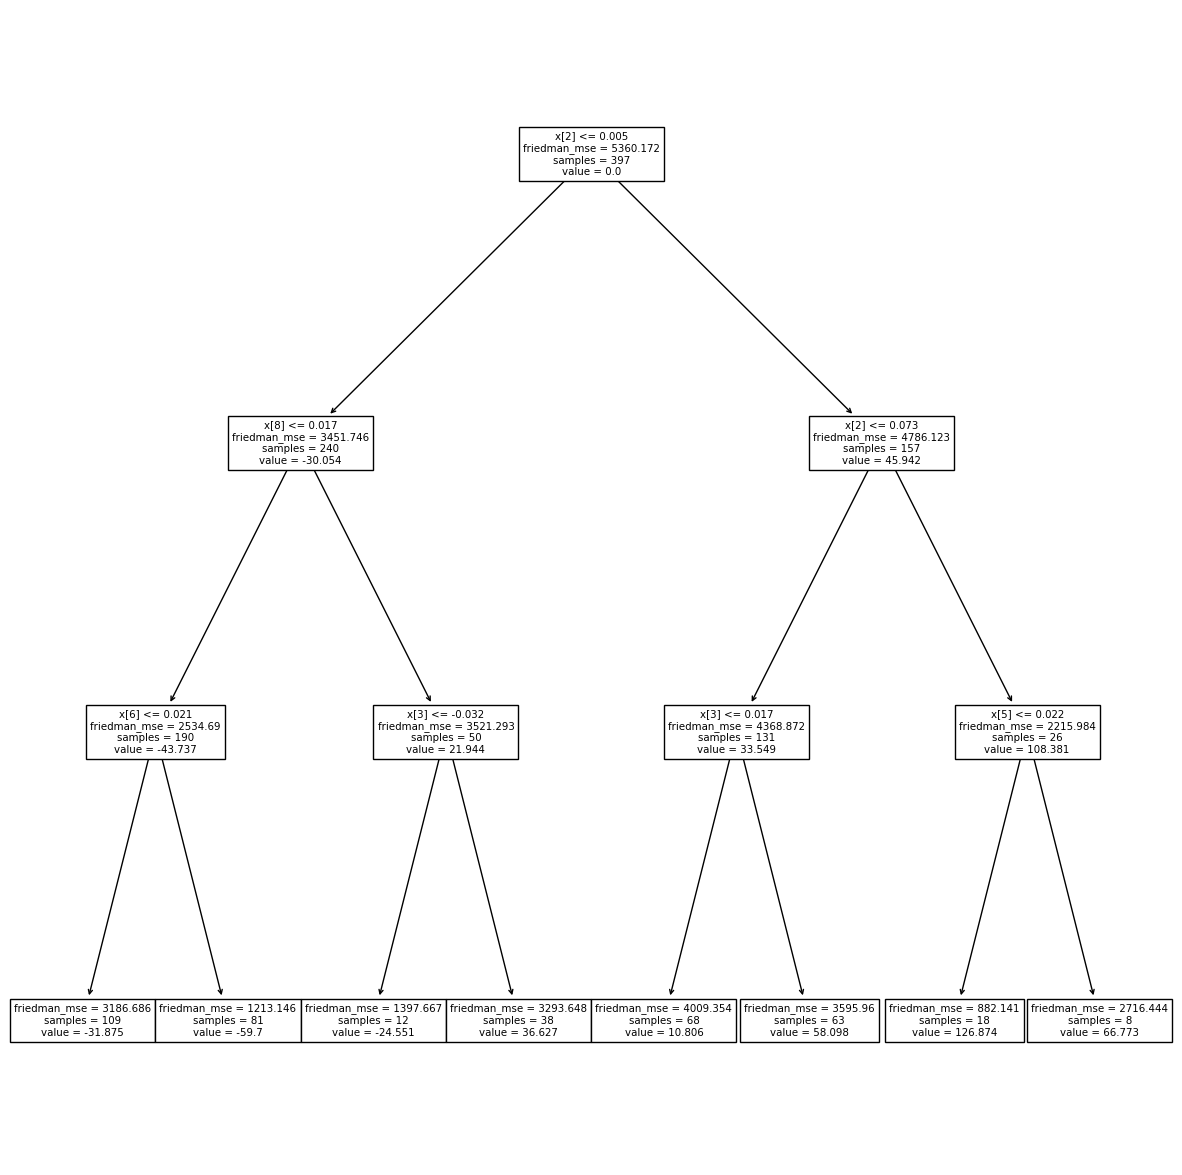

In [4]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 15))
plot_tree(gbr.estimators_[1][0])
plt.show()


#### Feature Importance Trends

In [5]:
feature_importances_per_iter = gbr.get_feature_importance_per_iteration()
feature_importances_per_iter

,0,1,2,3,4,5,6,7,8,9
0,0.022618,0.000000,0.286427,0.000000,0.000000,0.018400,0.022576,0.000000,0.584031,0.065947
1,0.000000,0.000000,0.667195,0.106884,0.000000,0.019933,0.035847,0.000000,0.170142,0.000000
2,0.000000,0.000000,0.303457,0.072887,0.000000,0.029205,0.000000,0.000000,0.594451,0.000000
3,0.000000,0.000000,0.353166,0.042172,0.000000,0.029677,0.000000,0.000000,0.574986,0.000000
4,0.036796,0.000000,0.272460,0.000000,0.019181,0.034321,0.000000,0.000000,0.548336,0.088906
5,0.000000,0.000000,0.473069,0.150546,0.000000,0.000000,0.000000,0.161464,0.138372,0.076549
6,0.000000,0.000000,0.281700,0.051261,0.000000,0.037825,0.000000,0.000000,0.551927,0.077288
7,0.026161,0.000000,0.596968,0.097337,0.000000,0.000000,0.000000,0.162349,0.075331,0.041853
8,0.000000,0.000000,0.170169,0.169442,0.000000,0.018175,0.108441,0.101457,0.432315,0.000000
9,0.052853,0.000000,0.568519,0.000000,0.096798,0.029517,0.000000,0.000000,0.252313,0.000000


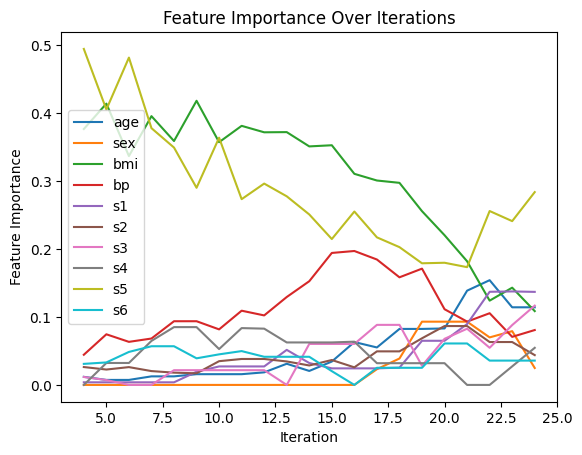

In [6]:
plot_feature_importances_per_iter(feature_importances_per_iter, feature_name_mappings)

We can estimate each feature's curve with a function, and perhaps come up with a gradient at a certain point for each feature. If the gradient stops increasing after n rounds of boosting, it can be an additional stopping criteria for professionals.

#### Feature Impact Tracking

In [7]:
feature_impacts_per_iter = gbr.get_feature_impacts_per_iteration()
feature_impacts_per_iter

,feature,iteration,impact,normalized_impact,samples
0,0,1,116.789474,0.286030,397
122,9,1,46.331102,0.113470,116
16,2,1,78.021918,0.191084,156
82,6,1,25.773333,0.063122,71
99,8,1,82.118565,0.201117,156
...,...,...,...,...,...
57,3,25,25.040299,0.131820,257
121,8,25,11.988594,0.063112,146
38,2,25,26.891235,0.141564,60
67,4,25,21.474731,0.113050,157


##### Feature Impact Tracking Per Iteration

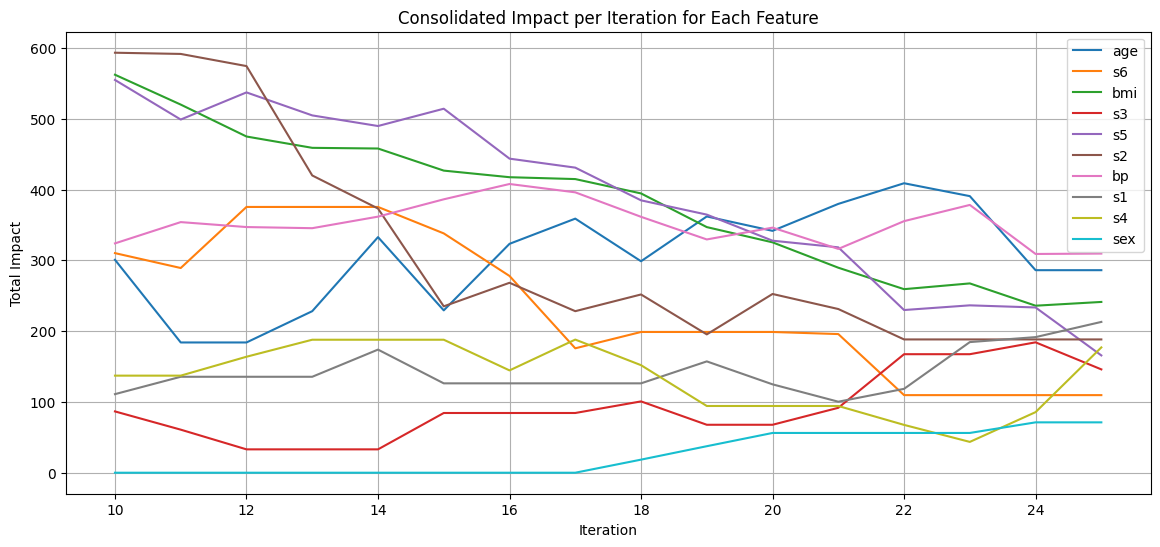

In [8]:
plot_feature_impacts_per_iter(feature_impacts_per_iter, feature_name_mappings=feature_name_mappings)

##### Feature Impact Tracking Per Iteration (Weighted by Samples)

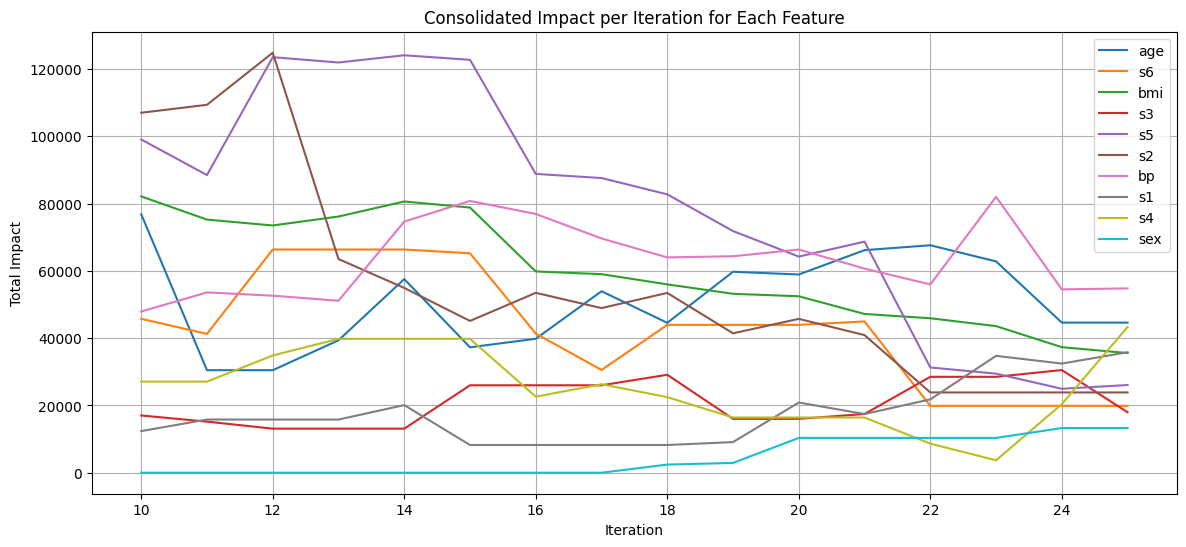

In [9]:
plot_feature_impacts_per_iter(feature_impacts_per_iter, weighted_by_samples=True, feature_name_mappings=feature_name_mappings)

##### Consolidated Feature Impacts

In [20]:
feature_impacts_per_iter_dir = gbr.get_feature_impacts_per_iteration(directional=True, normalized=False)

In [21]:
def plot_total_feature_impacts(feature_impacts_per_iter_df, weighted_by_samples=False, feature_name_mappings=None):
    df = pd.DataFrame(feature_impacts_per_iter_df)
    if feature_name_mappings:
        df['feature'] = df['feature'].apply(lambda x: feature_name_mappings[x])

    if weighted_by_samples:
        df['weighted_impact'] = df['impact'] * df['samples']
        df_weighted_grouped = df.groupby('feature')['weighted_impact'].sum()
        df_grouped = df_weighted_grouped
    else:
        df_grouped = df.groupby('feature')['impact'].sum()
    plt.figure(figsize=(10, 6))
    df_grouped.plot(kind='bar')
    plt.title('Total Impact for Each Feature')
    plt.xlabel('Feature')
    plt.ylabel('Total Impact')
    plt.xticks(rotation=45)
    plt.show()

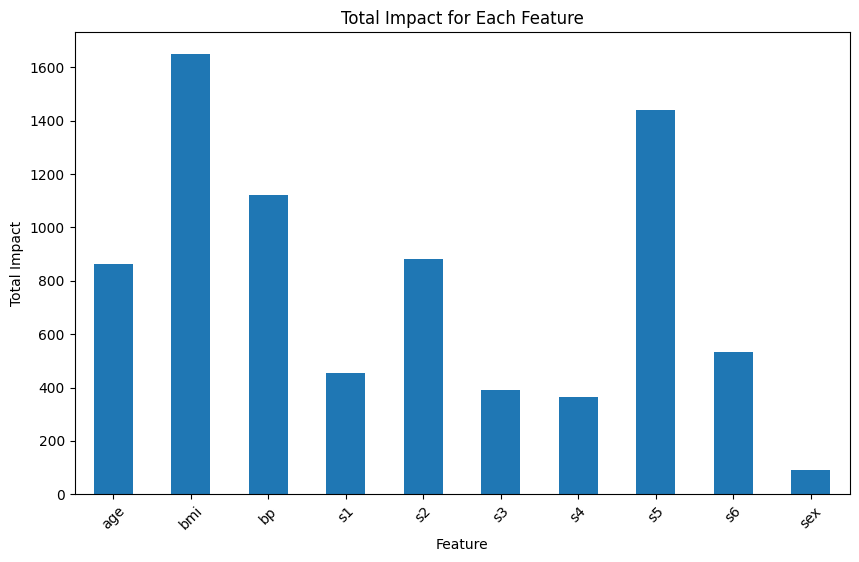

In [22]:
plot_total_feature_impacts(feature_impacts_per_iter_dir, feature_name_mappings=feature_name_mappings)

##### Consolidated Feature Impacts (Weighted by Samples)

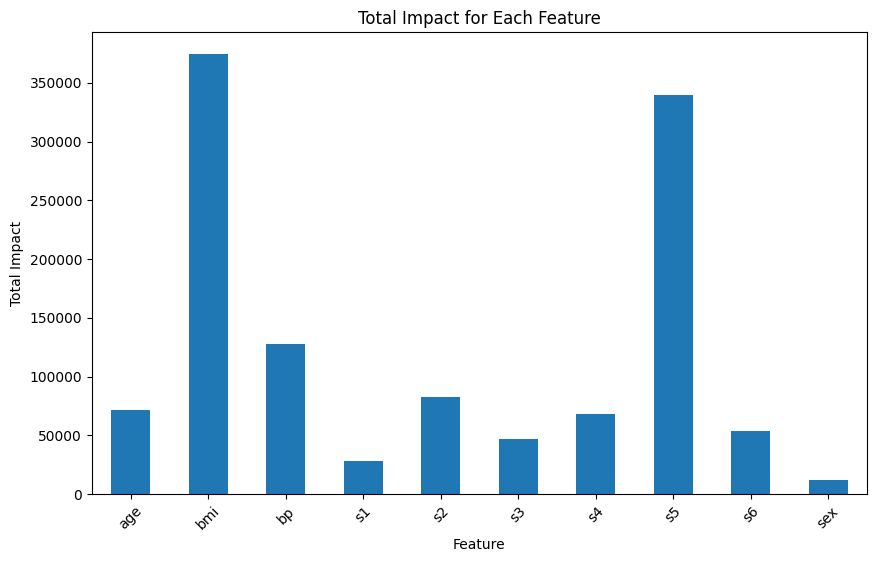

In [23]:
plot_total_feature_impacts(feature_impacts_per_iter_dir, weighted_by_samples=True, feature_name_mappings=feature_name_mappings)

##### Consolidated Directional Feature Impacts

In [24]:
feature_impacts_per_iter_dir['impact_direction'] = feature_impacts_per_iter_dir['impact'].apply(lambda x: 1 if x >= 0 else -1)
feature_impacts_per_iter_dir

,iteration,feature,threshold,impact,samples,impact_direction
0,1,8,-0.003761,82.118565,397,1
1,1,2,0.006189,66.107692,196,1
2,1,6,0.021028,25.773333,156,1
3,1,0,-0.079982,116.789474,40,1
4,1,2,0.068702,89.936143,201,1
...,...,...,...,...,...,...
164,25,8,0.016671,11.988594,397,1
165,25,7,0.146673,91.410147,257,1
166,25,6,-0.015789,13.152580,256,1
167,25,3,0.062619,25.040299,140,1


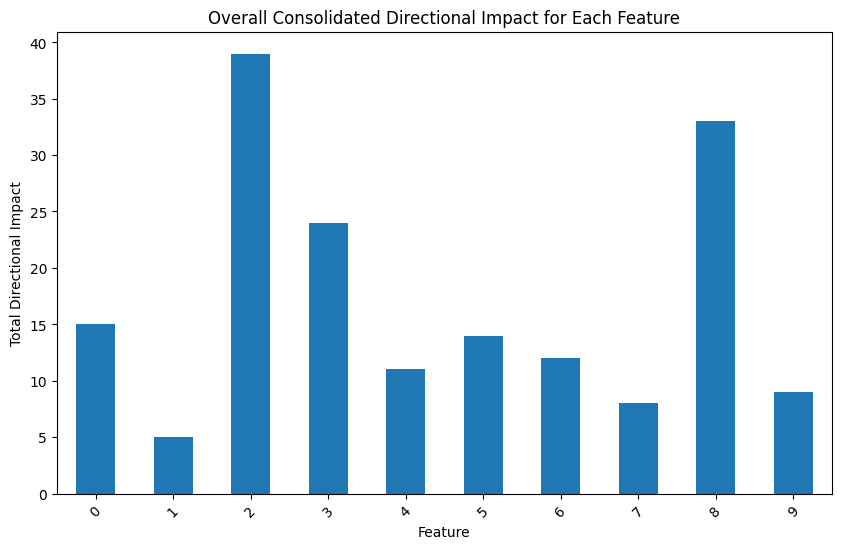

In [25]:
df_directional_grouped = feature_impacts_per_iter_dir.groupby('feature')['impact_direction'].sum()
plt.figure(figsize=(10, 6))
df_directional_grouped.plot(kind='bar')
plt.title('Overall Consolidated Directional Impact for Each Feature')
plt.xlabel('Feature')
plt.ylabel('Total Directional Impact')
plt.xticks(rotation=45)
plt.show()

### Prediction Path Feature Impacts

In [ ]:
gbr.estimators_[0][0].decision_path(X_test[0].reshape(1, -1)).toarray()[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
df_impacts = gbr.get_prediction_feature_impacts(X_test[0].reshape(1, -1))
df_impacts

,threshold,iteration,feature,impact
0,-0.003761,1,8,82.118565
1,0.068702,1,2,89.936143
2,0.034130,1,9,46.331102
3,0.005111,2,2,75.995646
4,0.017036,2,8,65.681201
...,...,...,...,...
70,-0.044704,24,8,24.341937
71,-0.045242,24,6,16.766213
72,0.016671,25,8,11.988594
73,0.062619,25,3,25.040299


In [ ]:
def plot_prediction_feature_impacts(predictions_df, feature_name_mappings=None):
    df = pd.DataFrame(predictions_df)
    if feature_name_mappings:
        df['feature'] = df['feature'].apply(lambda x: feature_name_mappings[x])

    aggregated_impacts = df.groupby('feature')['impact'].sum().reset_index()
    aggregated_impacts = aggregated_impacts.sort_values(by='feature')

    aggregated_impacts.plot(x='feature', y='impact', kind='bar', figsize=(10, 6))
    plt.title('Aggregated Feature Impacts for Single Prediction')
    plt.xlabel('Feature')
    plt.ylabel('Impacts')
    plt.xticks(rotation=45)
    plt.show()

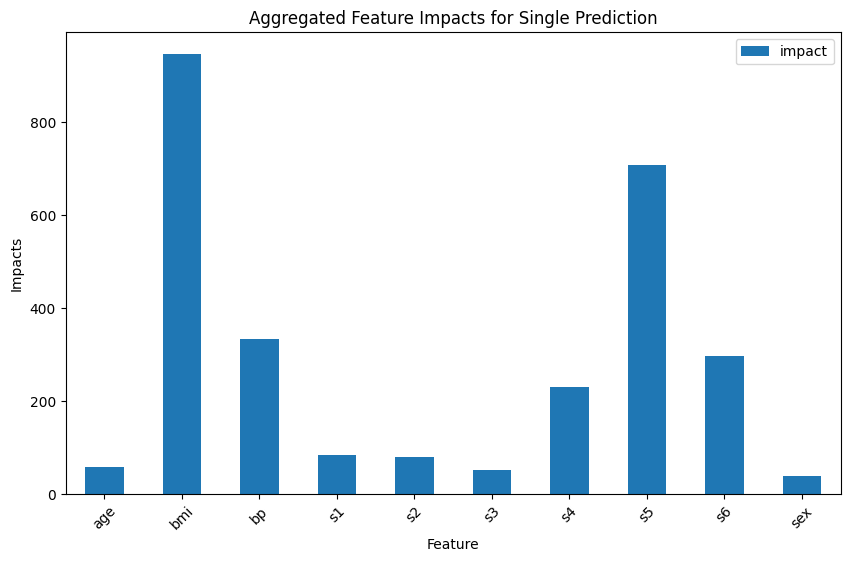

In [ ]:
plot_prediction_feature_impacts(df_impacts, feature_name_mappings=feature_name_mappings)